![](https://www.techemergence.com/wp-content/uploads/2017/11/ai-for-crime-prevention-and-detection-5-current-applications.png)

# 1. Import

In [1]:
import numpy as np
import pandas as pd

In [3]:
# visualization

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.basemap import Basemap
import folium
from folium import plugins

In [6]:
from sklearn import linear_model
import statsmodels.api as sm

# 2. Read data

In [7]:
df = pd.read_csv('crime.csv', encoding='latin-1')

C:\Users\RS COMPUTER\AppData\Local\Temp\ipykernel_4560\1764528364.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('crime.csv', encoding='latin-1')


# 3. Function

## 3.1. Function for research

In [8]:
def print_five_rows(name_column):
    return df[name_column][0:5]

In [9]:
def describe_column(name_column):
    return df[name_column].describe()

## 3.2. Function for visualization

In [10]:
def create_list_number_crime(name_column, list_unique):
    # list_unique = df[name_column].unique()
    
    i = 0
    
    list_number = list()
    
    while i < len(list_unique):
        list_number.append(len(df.loc[df[name_column] == list_unique[i]]))
        i += 1
    
    return list_unique, list_number

In [11]:
def pie_plot(list_number, list_unique):
    plt.figure(figsize=(20,10))
    plt.pie(list_unique, 
        labels=list_number,
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=140)
 
    plt.axis('equal')
    plt.show()
    return 0

In [12]:
def bar_chart(list_number, list_unique):
    objects = list_unique
    y_pos = np.arange(len(objects))
    performance = list_number
 
    plt.figure(figsize=(20,10))    
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Number') 
    plt.show()
    
    return 0

## 3.3. Function for modeling and cleaning

In [14]:
def drop_NaN_two_var(x, y):

    df1 = df[[x, y]].dropna()
    print(df1.shape)

    x_value = df1[x]
    y_value = df1[y]

    del df1
        
    print(x + ': ' + str(x_value.shape))
    print(y + ': ' + str(y_value.shape))
        
    return x_value, y_value

In [15]:
def function_OLS_Regression(x, y):
    
    model = sm.OLS(y, x)
    res = model.fit()
    return res.summary()

# 4. First data research

In [16]:
df.shape

(327820, 17)

In [17]:
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [18]:
df.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1774
REPORTING_AREA              0
SHOOTING               326765
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   93
STREET                  10977
Lat                     20632
Long                    20632
Location                    0
dtype: int64

### 4.1. INCIDENT_NUMBER (*will delete*)

Number for incident. This indicator is **difficult** for visualization, modeling and other research. I will **not** use it.

In [19]:
print_five_rows('INCIDENT_NUMBER')

0    I182080058
1    I182080053
2    I182080052
3    I182080051
4    I182080050
Name: INCIDENT_NUMBER, dtype: object

In [20]:
describe_column('INCIDENT_NUMBER')

count         327820
unique        290156
top       I162030584
freq              13
Name: INCIDENT_NUMBER, dtype: object

In [23]:
print_five_rows('OFFENSE_CODE')

0    2403
1    3201
2    2647
3     413
4    3122
Name: OFFENSE_CODE, dtype: int64

In [24]:
len(df['OFFENSE_CODE'].unique())

222

In [25]:
print_five_rows('OFFENSE_CODE_GROUP')

0    Disorderly Conduct
1         Property Lost
2                 Other
3    Aggravated Assault
4              Aircraft
Name: OFFENSE_CODE_GROUP, dtype: object

In [26]:
describe_column('OFFENSE_CODE_GROUP')

count                              327820
unique                                 67
top       Motor Vehicle Accident Response
freq                                38134
Name: OFFENSE_CODE_GROUP, dtype: object

In [27]:
print_five_rows('OFFENSE_DESCRIPTION')

0              DISTURBING THE PEACE
1                   PROPERTY - LOST
2         THREATS TO DO BODILY HARM
3    ASSAULT - AGGRAVATED - BATTERY
4                AIRCRAFT INCIDENTS
Name: OFFENSE_DESCRIPTION, dtype: object

In [28]:
describe_column('OFFENSE_DESCRIPTION')

count                            327820
unique                              244
top       SICK/INJURED/MEDICAL - PERSON
freq                              19360
Name: OFFENSE_DESCRIPTION, dtype: object

In [29]:
print_five_rows('DISTRICT')

0    E18
1    D14
2     B2
3     A1
4     A7
Name: DISTRICT, dtype: object

In [30]:
describe_column('DISTRICT')

count     326046
unique        12
top           B2
freq       51288
Name: DISTRICT, dtype: object

In [31]:
df['DISTRICT'].unique()

array(['E18', 'D14', 'B2', 'A1', 'A7', 'C11', nan, 'D4', 'E13', 'B3',
       'C6', 'A15', 'E5'], dtype=object)

In [32]:
print_five_rows('REPORTING_AREA')

0    495
1    795
2    329
3     92
4     36
Name: REPORTING_AREA, dtype: object

In [33]:
describe_column('REPORTING_AREA')

count     327820
unique       880
top             
freq       20920
Name: REPORTING_AREA, dtype: object

In [34]:
print_five_rows('SHOOTING')

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: SHOOTING, dtype: object

In [35]:
df['SHOOTING'].unique()

array([nan, 'Y'], dtype=object)

In [36]:
print_five_rows('OCCURRED_ON_DATE')

0    2018-10-03 20:13:00
1    2018-08-30 20:00:00
2    2018-10-03 19:20:00
3    2018-10-03 20:00:00
4    2018-10-03 20:49:00
Name: OCCURRED_ON_DATE, dtype: object

In [37]:
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'])

In [38]:
describe_column('OCCURRED_ON_DATE')

count                           327820
mean     2017-02-10 07:26:53.977786368
min                2015-06-15 00:00:00
25%                2016-04-20 09:43:45
50%                2017-02-14 15:49:00
75%                2017-11-30 18:23:45
max                2018-10-03 20:49:00
Name: OCCURRED_ON_DATE, dtype: object

In [39]:
print_five_rows('YEAR')

0    2018
1    2018
2    2018
3    2018
4    2018
Name: YEAR, dtype: int64

In [40]:
df['MONTH'].unique()

array([10,  8,  5,  9,  6,  4,  7,  3,  2,  1, 11, 12], dtype=int64)

In [41]:
df['DAY_OF_WEEK'].unique()

array(['Wednesday', 'Thursday', 'Tuesday', 'Monday', 'Saturday', 'Sunday',
       'Friday'], dtype=object)

In [42]:
df['HOUR'].unique()

array([20, 19, 17,  8, 18,  0, 22, 15,  7, 13, 16, 11,  9, 14, 10, 12, 21,
        5,  6,  4, 23,  3,  2,  1], dtype=int64)

In [43]:
df['UCR_PART'].unique()

array(['Part Two', 'Part Three', 'Part One', nan, 'Other'], dtype=object)

In [44]:
print_five_rows('STREET')

0    ARLINGTON ST
1      ALLSTON ST
2        DEVON ST
3    CAMBRIDGE ST
4     PRESCOTT ST
Name: STREET, dtype: object

In [45]:
describe_column('STREET')

count            316843
unique             4684
top       WASHINGTON ST
freq              14590
Name: STREET, dtype: object

In [46]:
df[['Lat', 'Long']].head()

,Lat,Long
0,42.262608,-71.121186
1,42.352111,-71.135311
2,42.308126,-71.076930
3,42.359454,-71.059648
4,42.375258,-71.024663


In [47]:
describe_column('Lat')

count    307188.000000
mean         42.212995
std           2.173496
min          -1.000000
25%          42.297466
50%          42.325552
75%          42.348624
max          42.395042
Name: Lat, dtype: float64

In [48]:
describe_column('Long')

count    307188.000000
mean        -70.906030
std           3.515832
min         -71.178674
25%         -71.097081
50%         -71.077493
75%         -71.062482
max          -1.000000
Name: Long, dtype: float64

In [49]:
df['Location'].head()

0    (42.26260773, -71.12118637)
1    (42.35211146, -71.13531147)
2    (42.30812619, -71.07692974)
3    (42.35945371, -71.05964817)
4    (42.37525782, -71.02466343)
Name: Location, dtype: object

# 5. Visualization

### 5.1. District

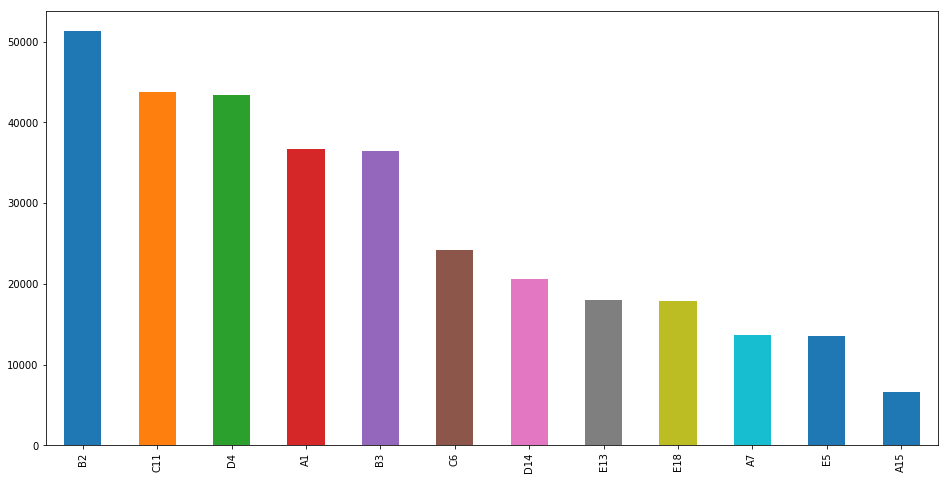

In [46]:
plt.figure(figsize=(16,8))
df['DISTRICT'].value_counts().plot.bar()
plt.show()

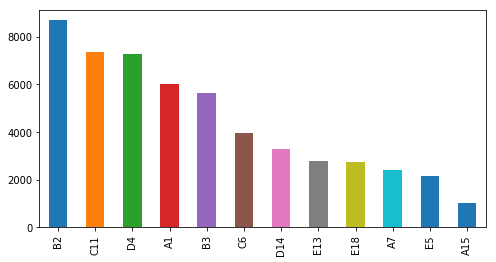

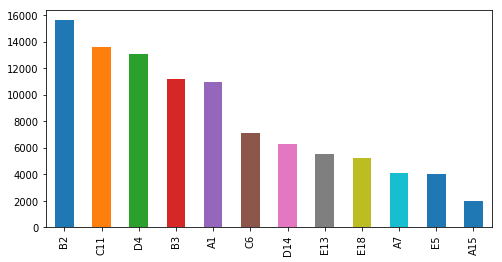

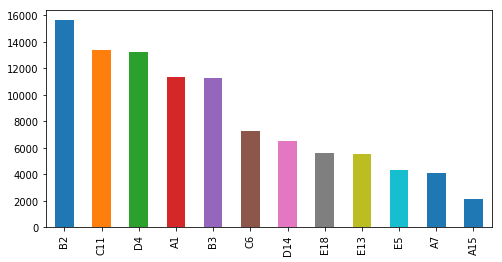

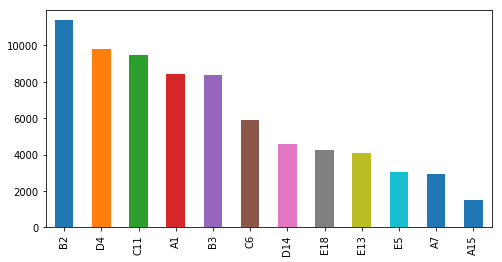

In [47]:
# 2015
plt.figure(figsize=(8,4))
df['DISTRICT'].loc[df['YEAR']==2015].value_counts().plot.bar()
plt.show()

# 2016
plt.figure(figsize=(8,4))
df['DISTRICT'].loc[df['YEAR']==2016].value_counts().plot.bar()
plt.show()

# 2017
plt.figure(figsize=(8,4))
df['DISTRICT'].loc[df['YEAR']==2017].value_counts().plot.bar()
plt.show()

# 2018
plt.figure(figsize=(8,4))
df['DISTRICT'].loc[df['YEAR']==2018].value_counts().plot.bar()
plt.show()

In [48]:
i = 1

while i < 13:
    print('== ' + str(i) + ' ==')
    print(df['DISTRICT'].loc[df['MONTH']==i].value_counts())
    i +=1

== 1 ==
B2     3772
C11    3254
D4     2936
B3     2682
A1     2564
C6     1752
D14    1424
E18    1333
E13    1301
E5     1027
A7     1016
A15     479
Name: DISTRICT, dtype: int64
== 2 ==
B2     3289
C11    2936
D4     2876
B3     2381
A1     2340
C6     1569
D14    1390
E18    1276
E13    1246
A7      929
E5      920
A15     443
Name: DISTRICT, dtype: int64
== 3 ==
B2     3937
C11    3203
D4     3145
B3     2687
A1     2595
C6     1904
D14    1451
E13    1304
E18    1299
E5     1059
A7      957
A15     506
Name: DISTRICT, dtype: int64
== 4 ==
B2     3865
C11    3239
D4     3154
B3     2731
A1     2582
C6     1847
D14    1405
E13    1361
E18    1303
A7     1047
E5     1017
A15     476
Name: DISTRICT, dtype: int64
== 5 ==
B2     4048
C11    3623
D4     3423
B3     2998
A1     2902
C6     1812
D14    1731
E18    1459
E13    1454
A7     1081
E5     1064
A15     565
Name: DISTRICT, dtype: int64
== 6 ==
B2     4790
D4     4103
C11    4001
B3     3401
A1     3251
C6     2250
D14    1919
E18

### 5.2. Total number crime for each year

In [49]:
list_unique_year, list_number_year = create_list_number_crime('YEAR',df['YEAR'].unique())

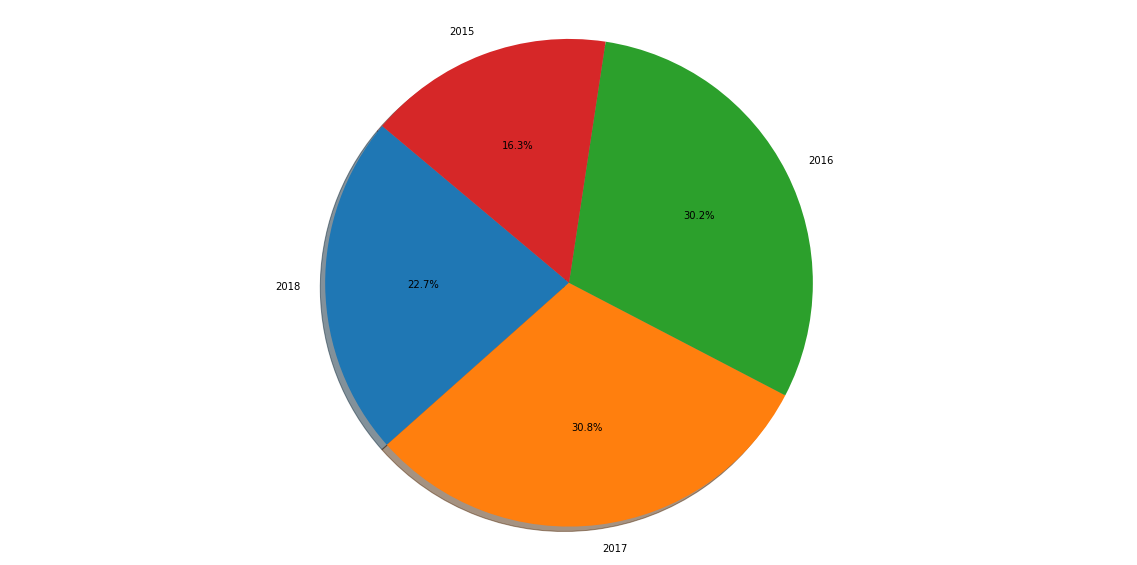

0

In [50]:
pie_plot(list_unique_year, list_number_year)

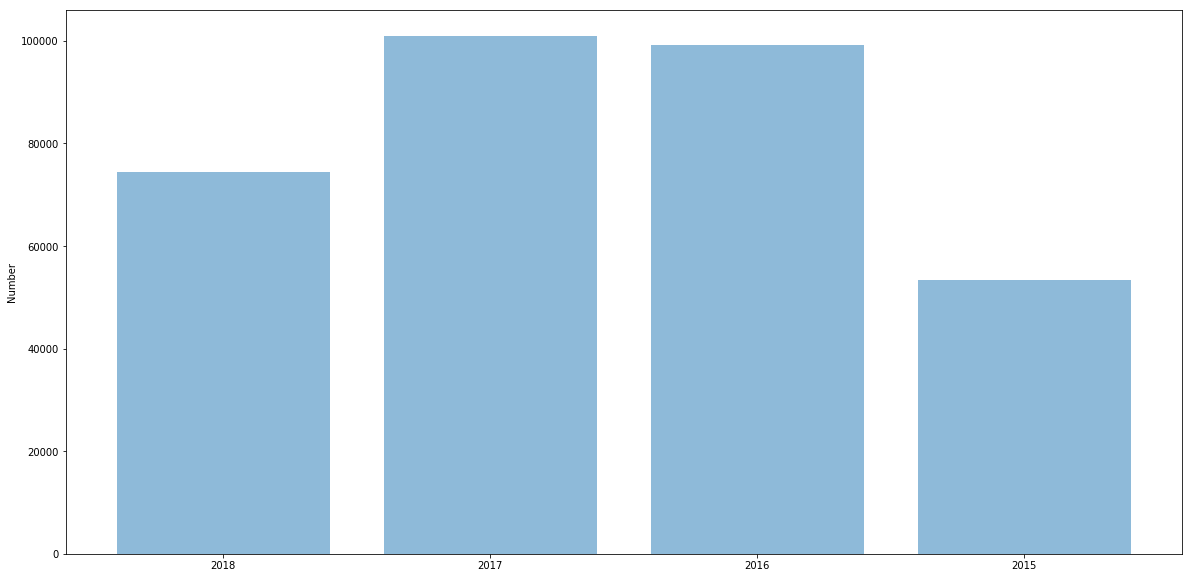

0

In [51]:
bar_chart(list_number_year,list_unique_year)

### 5.3.  Total number crime for each month

In [52]:
list_unique_month, list_number_month = create_list_number_crime('MONTH',list(range(1,13)))

In [53]:
# pie_plot(list_unique_month,list_number_month)

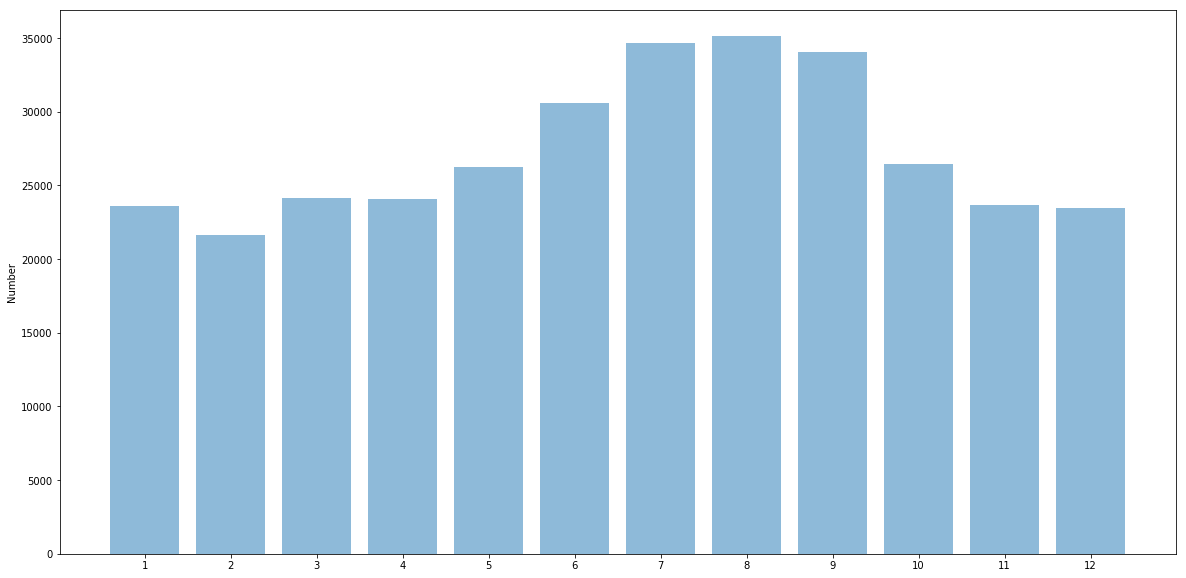

0

In [54]:
bar_chart(list_number_month,list_unique_month)

### 5.4. Total number crime for each day of week

In [55]:
day_of_week = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')

In [56]:
list_unique_day, list_number_day = create_list_number_crime('DAY_OF_WEEK',day_of_week)

In [57]:
#pie_plot(list_unique_day,list_number_day)

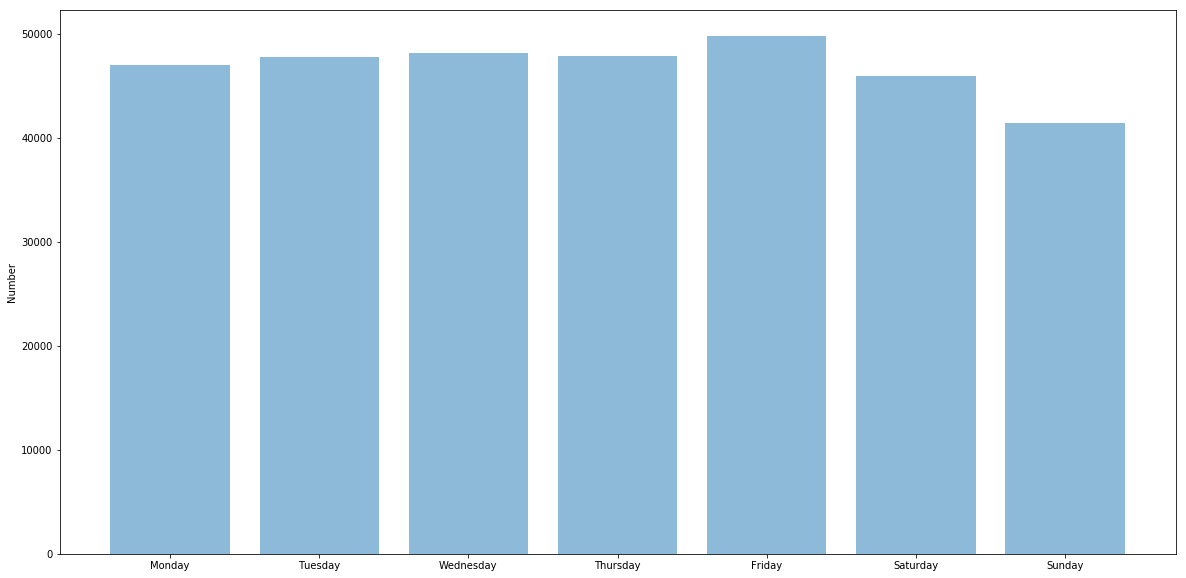

0

In [58]:
bar_chart(list_number_day,list_unique_day)

### 5.5. Total number crime for each hour

In [59]:
list_unique_hour, list_number_hour = create_list_number_crime('HOUR',list(range(0,24)))

In [60]:
# pie_plot(list_unique_hour, list_number_hour)

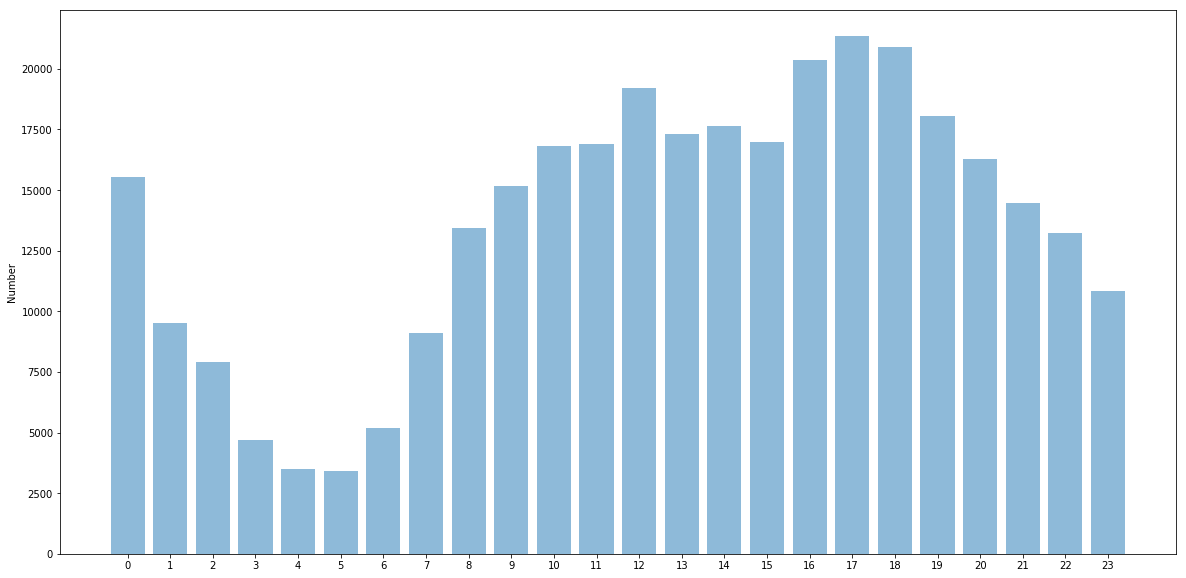

0

In [61]:
bar_chart(list_number_hour,list_unique_hour)

### 5.6. SHOOTING

In [50]:
df['SHOOTING'].fillna(0, inplace = True)

df['SHOOTING'] = df['SHOOTING'].map({
    0: 0,
    'Y':1
})

In [51]:
shoot_true = len(df.loc[df['SHOOTING'] == 1])
shoot_false = len(df.loc[df['SHOOTING'] == 0])

In [52]:
print('With shooting(num): ' + str(shoot_true))
print('With shooting(%):   ' + str(round(shoot_true*100/len(df),2))+'%')
print()
print('Without shooting(num): ' + str(shoot_false))
print('Without shooting(%):   ' + str(round(shoot_false*100/len(df),2))+'%')

With shooting(num): 1055
With shooting(%):   0.32%

Without shooting(num): 326765
Without shooting(%):   99.68%


In [53]:
df_shoot = df.loc[df['SHOOTING'] == 1]
df_shoot.shape

(1055, 17)

#### 5.6.1. Shooting & year

In [54]:
shoot_y_2015 = len(df_shoot.loc[df_shoot['YEAR'] == 2015])
shoot_y_2016 = len(df_shoot.loc[df_shoot['YEAR'] == 2016])
shoot_y_2017 = len(df_shoot.loc[df_shoot['YEAR'] == 2017])
shoot_y_2018 = len(df_shoot.loc[df_shoot['YEAR'] == 2018])

unique_shoot_year = '2015', '2016', '2017', '2018'
number_shoot_year = [shoot_y_2015, shoot_y_2016, shoot_y_2017, shoot_y_2018]

In [67]:
# pie_plot(unique_shoot_year,number_shoot_year)

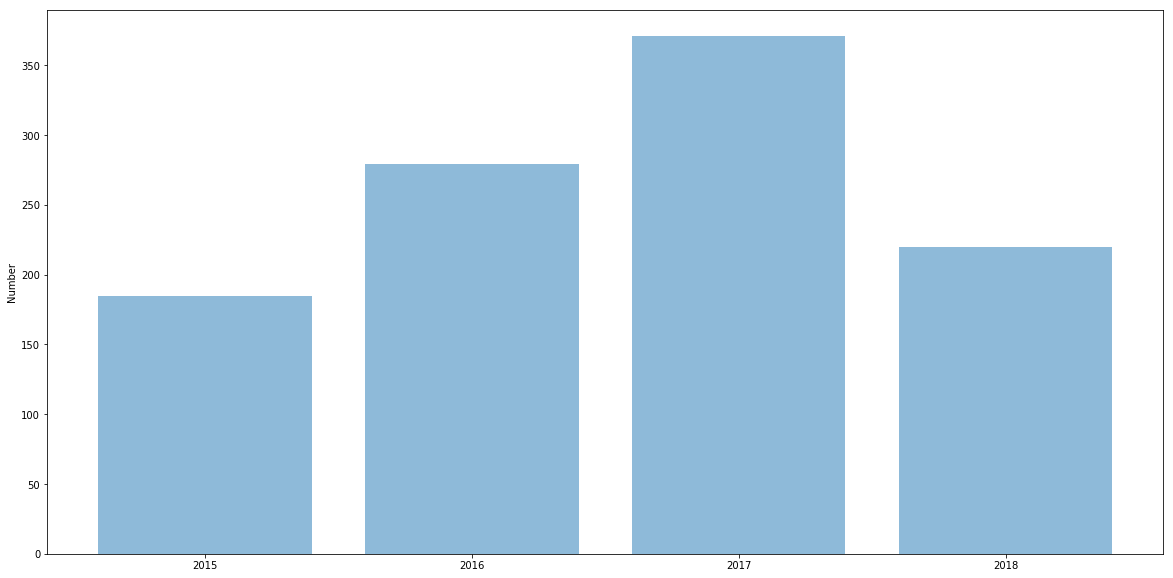

0

In [68]:
bar_chart(number_shoot_year,unique_shoot_year)

#### 5.6.2. Shooting & month

In [55]:
i = 1
list_month = list()

while i <= 12:
    list_month.append(len(df_shoot.loc[df_shoot['MONTH'] == i]))
    i+=1

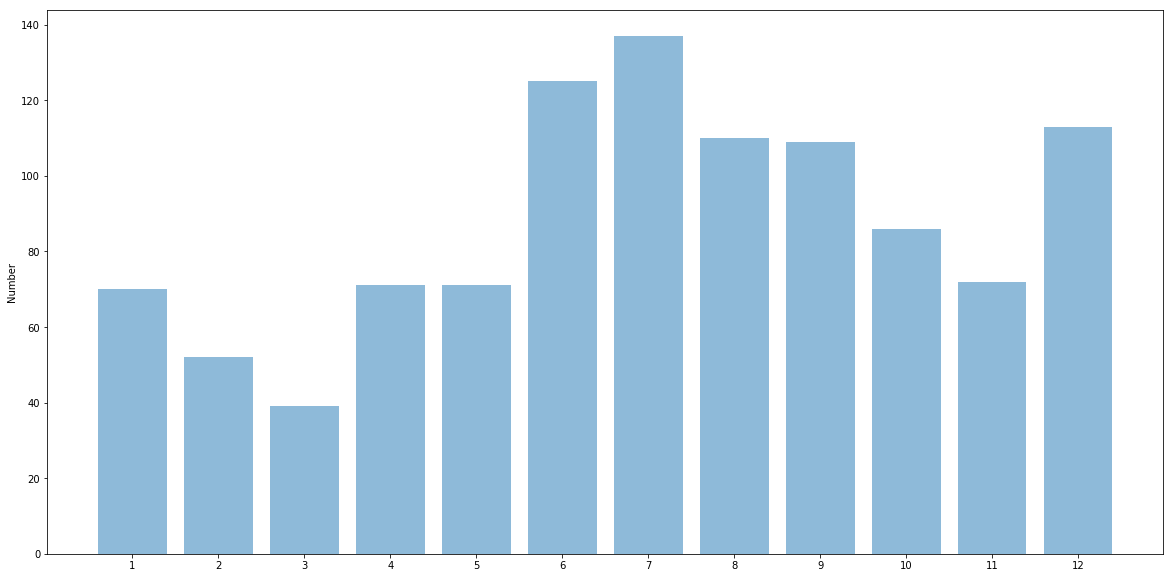

0

In [71]:
bar_chart(list_month,list(range(1,13)))

In [56]:
day_of_week = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')

i = 0
day_number = list()

while i < 7:
    day_number.append(len(df_shoot.loc[df_shoot['DAY_OF_WEEK'] == day_of_week[i]]))
    
    i +=1

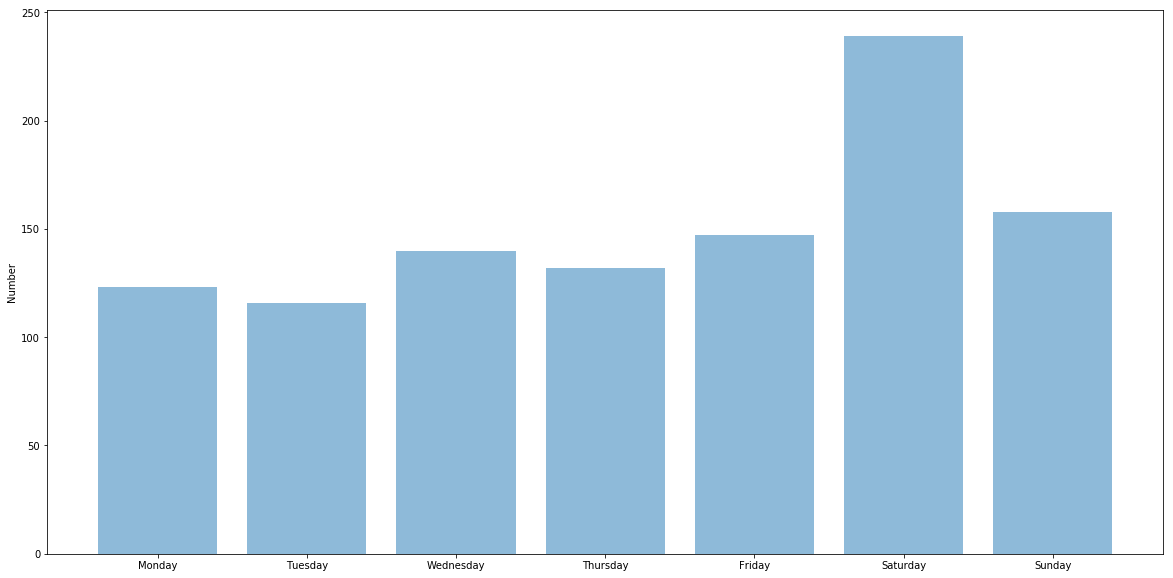

0

In [74]:
bar_chart(day_number,day_of_week)

#### 5.6.4. Shooting & hour

In [57]:
i = 0
hour_number = list()

while i < 24:
    hour_number.append(len(df_shoot.loc[df_shoot['HOUR'] == i]))
    i +=1

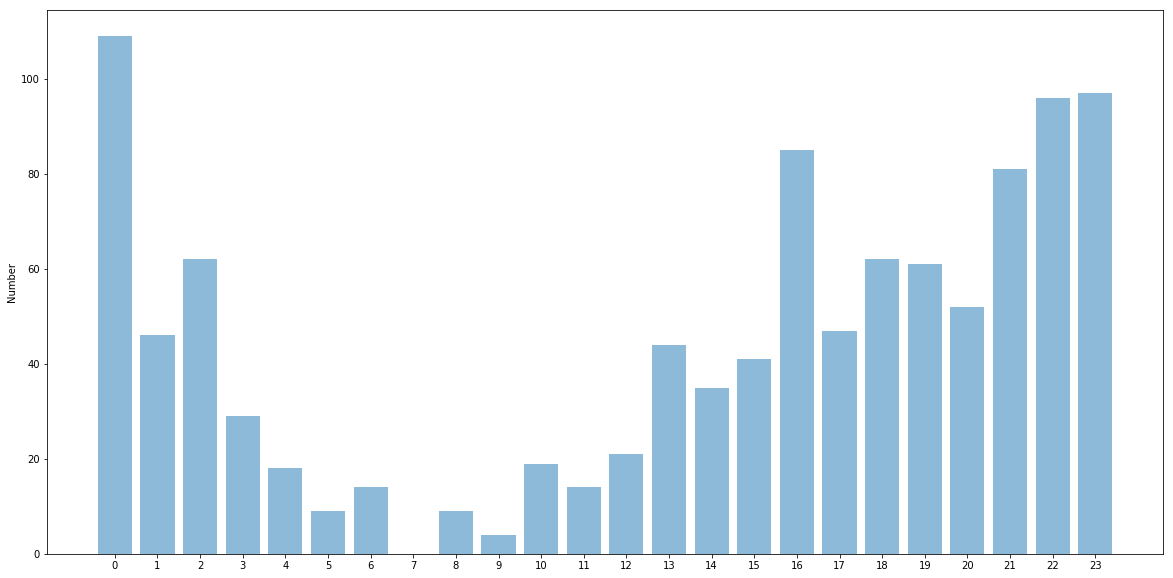

0

In [77]:
bar_chart(hour_number,list(range(0,24)))

#### 5.6.5. Shooting & District

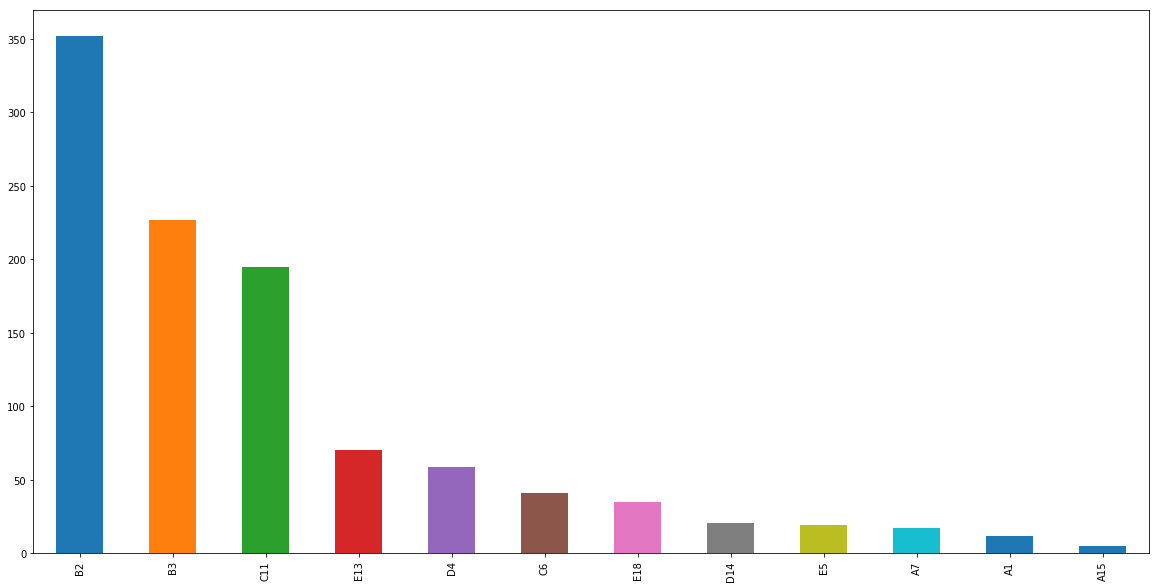

In [78]:
plt.figure(figsize=(20,10))
df_shoot['DISTRICT'].value_counts().plot.bar()
plt.show()

#### 5.6.6. Shooting and location

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


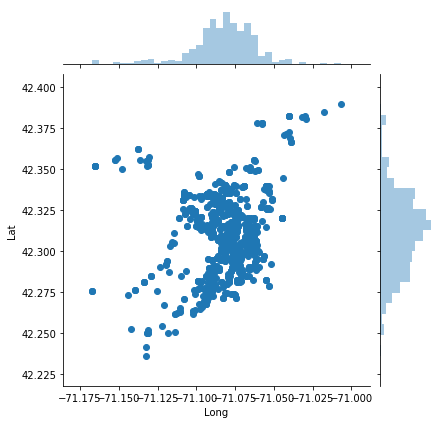

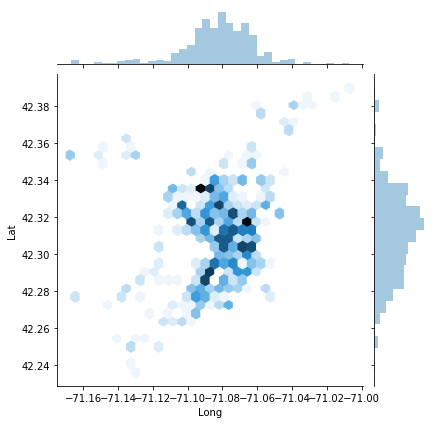

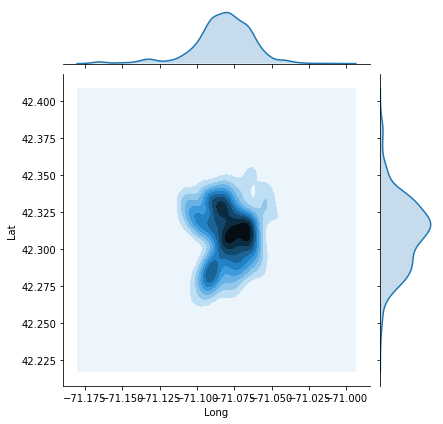

In [79]:
location_shoot = df_shoot[['Lat','Long']]
location_shoot = location_shoot.dropna()

location_shoot = location_shoot.loc[(location_shoot['Lat']>40) & (location_shoot['Long'] < -60)]  

x_shoot = location_shoot['Long']
y_shoot = location_shoot['Lat']

# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.jointplot(x_shoot, y_shoot, kind='scatter')
sns.jointplot(x_shoot, y_shoot, kind='hex')
sns.jointplot(x_shoot, y_shoot, kind='kde')

#### 5.7. UCR_PART

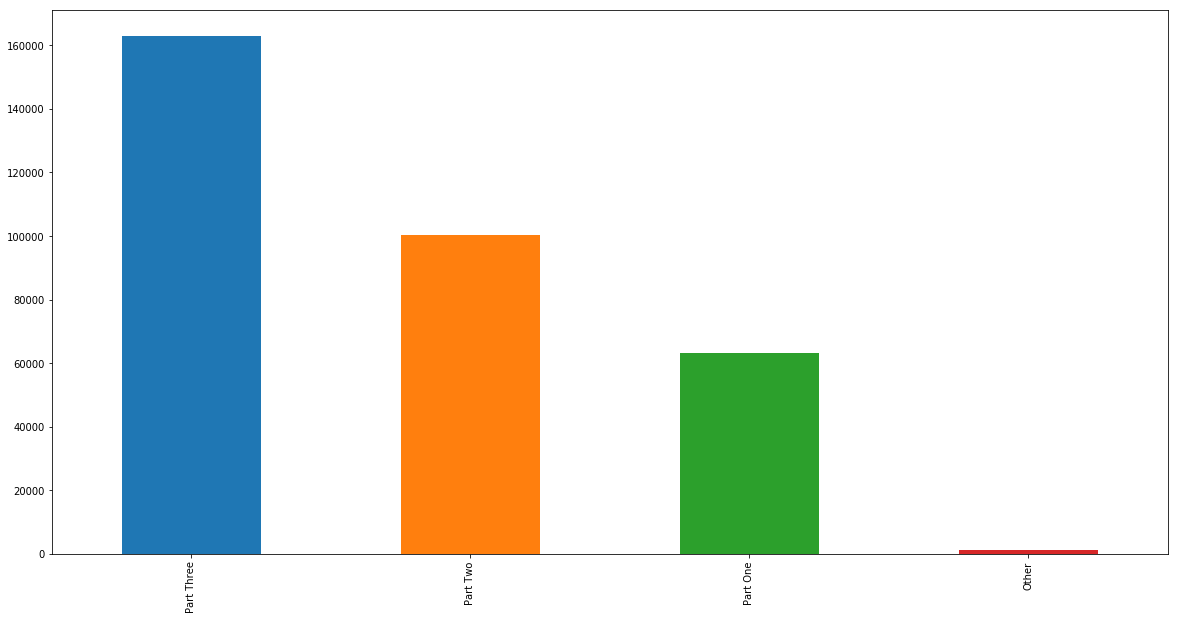

In [80]:
plt.figure(figsize=(20,10))
df['UCR_PART'].value_counts().plot.bar()
plt.show()


#### 5.8. Lat, Long

In [58]:
df[['Lat','Long']].describe()

,Lat,Long
count,307188.000000,307188.000000
mean,42.212995,-70.906030
std,2.173496,3.515832
min,-1.000000,-71.178674
25%,42.297466,-71.097081
50%,42.325552,-71.077493
75%,42.348624,-71.062482
max,42.395042,-1.000000


In [59]:
location = df[['Lat','Long']]
location = location.dropna()

location = location.loc[(location['Lat']>40) & (location['Long'] < -60)]  

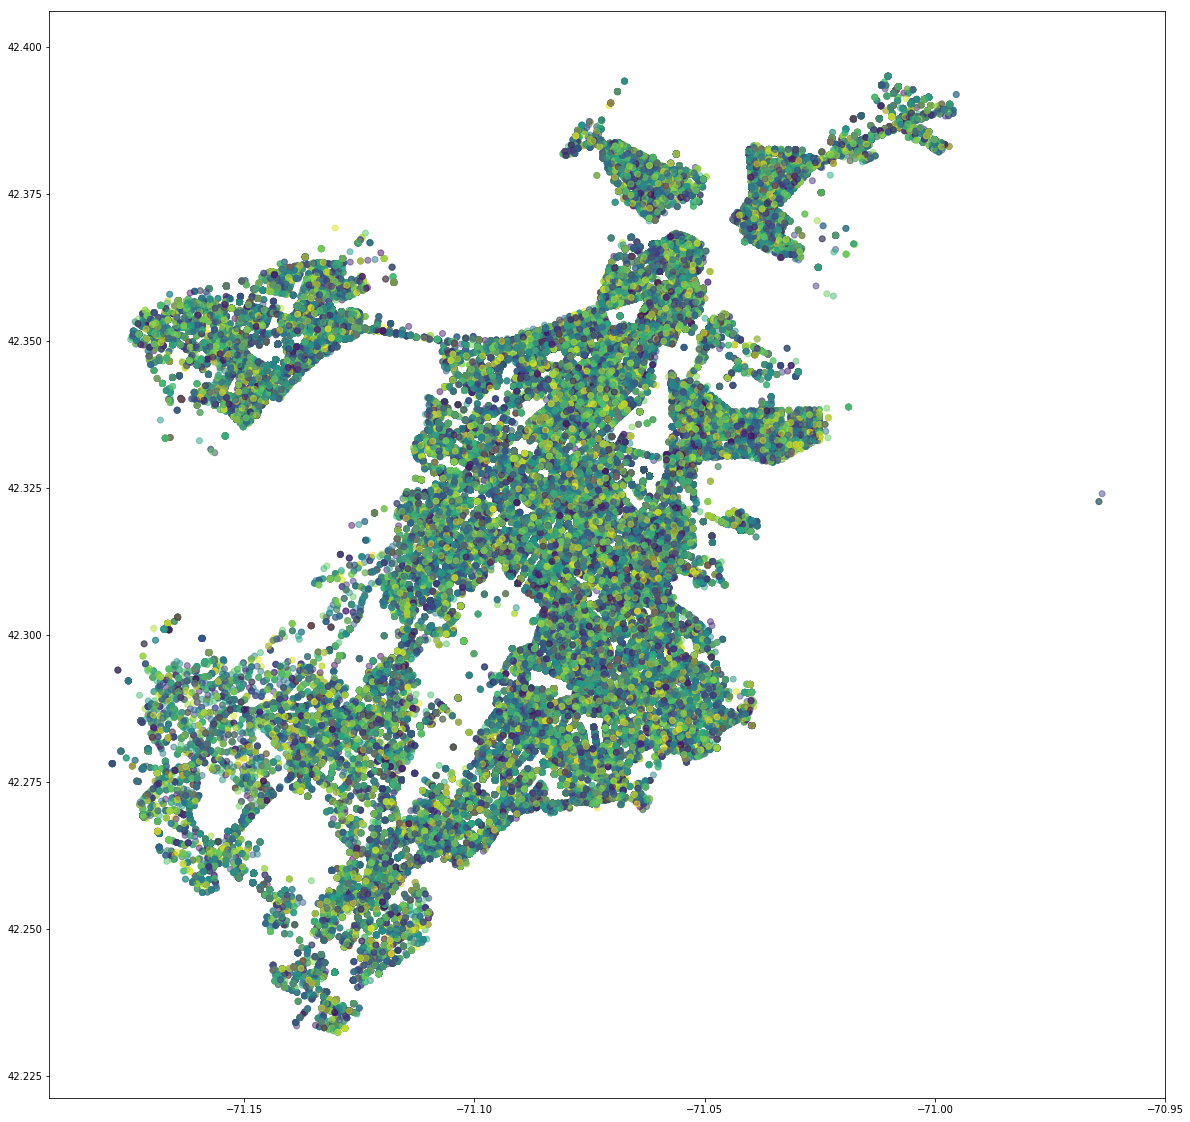

In [83]:
x = location['Long']
y = location['Lat']


colors = np.random.rand(len(x))

plt.figure(figsize=(20,20))
plt.scatter(x, y,c=colors, alpha=0.5)
plt.show()

In [60]:
df.isnull().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                1774
REPORTING_AREA             0
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                  93
STREET                 10977
Lat                    20632
Long                   20632
Location                   0
dtype: int64

In [61]:
df['Day'] = 0

In [62]:
df['Night'] = 0

In [63]:
# Day or night for 1st month
df['Day'].loc[(df['MONTH'] == 1) & (df['HOUR'] >= 6) & (df['HOUR'] <= 18)] = 1

# Day or night for 2st month
df['Day'].loc[(df['MONTH'] == 2) & (df['HOUR'] >= 6) & (df['HOUR'] <= 19)] = 1

# for 3st month
df['Day'].loc[(df['MONTH'] == 3) & (df['HOUR'] >= 6) & (df['HOUR'] <= 20)] = 1

# Day or night for 4st month
df['Day'].loc[(df['MONTH'] == 4) & (df['HOUR'] >= 5) & (df['HOUR'] <= 20)] = 1

# Day or night for 5st month
df['Day'].loc[(df['MONTH'] == 5) & (df['HOUR'] >= 5) & (df['HOUR'] <= 21)] = 1

# Day or night for 6st month
df['Day'].loc[(df['MONTH'] == 6) & (df['HOUR'] >= 4) & (df['HOUR'] <= 21)] = 1

# Day or night for 7st month
df['Day'].loc[(df['MONTH'] == 7) & (df['HOUR'] >= 5) & (df['HOUR'] <= 21)] = 1

# Day or night for 8st month
df['Day'].loc[(df['MONTH'] == 8) & (df['HOUR'] >= 5) & (df['HOUR'] <= 21)] = 1

# Day or night for 9st month
df['Day'].loc[(df['MONTH'] == 9) & (df['HOUR'] >= 6) & (df['HOUR'] <= 20)] = 1

# Day or night for 10st month
df['Day'].loc[(df['MONTH'] == 10) & (df['HOUR'] >= 6) & (df['HOUR'] <= 19)] = 1

# Day or night for 11st month
df['Day'].loc[(df['MONTH'] == 11) & (df['HOUR'] >= 6) & (df['HOUR'] <= 17)] = 1

# Day or night for 12st month
df['Day'].loc[(df['MONTH'] == 12) & (df['HOUR'] >= 7) & (df['HOUR'] <= 17)] = 1

C:\Users\RS COMPUTER\AppData\Local\Temp\ipykernel_4560\3601025578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'].loc[(df['MONTH'] == 1) & (df['HOUR'] >= 6) & (df['HOUR'] <= 18)] = 1
C:\Users\RS COMPUTER\AppData\Local\Temp\ipykernel_4560\3601025578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'].loc[(df['MONTH'] == 2) & (df['HOUR'] >= 6) & (df['HOUR'] <= 19)] = 1
C:\Users\RS COMPUTER\AppData\Local\Temp\ipykernel_4560\3601025578.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [64]:
df['Night'].loc[df['Day']==0]=1

C:\Users\RS COMPUTER\AppData\Local\Temp\ipykernel_4560\1384642877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Night'].loc[df['Day']==0]=1


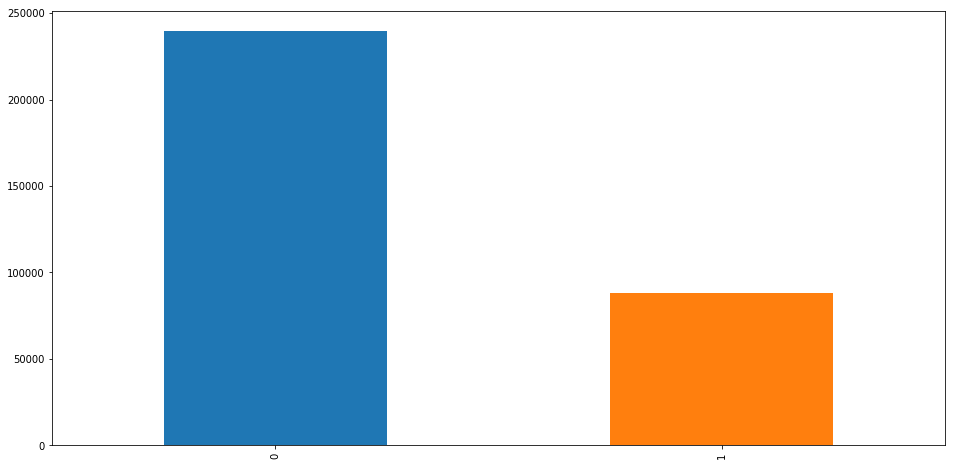

In [92]:
plt.figure(figsize=(16,8))
df['Night'].value_counts().plot.bar()
plt.show()

# 6. Modeling

### 6.1. Multi classification
Y - OFFENSE_CODE_GROUP

X - 'DISTRICT','REPORTING_AREA','MONTH','DAY_OF_WEEK',
               'HOUR','Lat','Long', 'OFFENSE_CODE_GROUP','Day','Night'

In [65]:
df['OFFENSE_CODE_GROUP'].value_counts().head(15)

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    38134
Larceny                            26670
Medical Assistance                 24226
Investigate Person                 19176
Other                              18612
Drug Violation                     17037
Simple Assault                     16263
Vandalism                          15810
Verbal Disputes                    13478
Towed                              11632
Investigate Property               11443
Larceny From Motor Vehicle         11120
Property Lost                      10077
Warrant Arrests                     8579
Aggravated Assault                  8033
Name: count, dtype: int64

In [66]:
list_offense_code_group = ('Motor Vehicle Accident Response',
                           'Larceny',
                           'Medical Assistance',
                           'Investigate Person',
                           'Other',
                           'Drug Violation',
                           'Simple Assault',
                           'Vandalism',
                           'Verbal Disputes',
                           'Towed',
                           'Investigate Property',
                           'Larceny From Motor Vehicle')

In [67]:
df_model = pd.DataFrame()

In [69]:
list_column = ['DISTRICT','REPORTING_AREA','MONTH','DAY_OF_WEEK',
               'HOUR','Lat','Long', 'OFFENSE_CODE_GROUP','Day','Night']

In [100]:
# REPORTING_AREA

df_model['REPORTING_AREA'] = pd.to_numeric(df_model['REPORTING_AREA'], errors='coerce')

In [101]:
# MONTH

df_model['MONTH'].unique()

array([10,  9,  8,  5,  7,  6,  3,  4, 11, 12,  1,  2])

In [102]:
# DAY_OF_WEEK

df_model['DAY_OF_WEEK'] = df_model['DAY_OF_WEEK'].map({
    'Tuesday':2, 
    'Saturday':6, 
    'Monday':1, 
    'Sunday':7, 
    'Thursday':4, 
    'Wednesday':3,
    'Friday':5
})

df_model['DAY_OF_WEEK'].unique()

array([3, 2, 1, 7, 4, 5, 6])

In [103]:
# HOUR

df_model['HOUR'].unique()

array([20, 19, 15, 16, 14,  9, 17, 11, 22,  8,  7,  0, 23, 21, 10, 18, 12,
        2,  6, 13,  5,  4,  3,  1])

In [104]:
# Lat, Long

df_model[['Lat', 'Long']].head()

,Lat,Long
6,42.320734,-71.056764
10,42.344323,-71.157784
15,42.315961,-71.090426
20,42.330015,-71.038513
68,42.310910,-71.057674


In [105]:
df_model.fillna(0, inplace = True)

In [106]:
x = df_model[['DISTRICT','REPORTING_AREA','MONTH','DAY_OF_WEEK','HOUR','Lat','Long','Day','Night']]

In [107]:
y = df_model['OFFENSE_CODE_GROUP']

In [108]:
y.unique()

array(['Motor Vehicle Accident Response', 'Larceny', 'Medical Assistance',
       'Investigate Person', 'Other', 'Drug Violation', 'Simple Assault',
       'Vandalism', 'Verbal Disputes', 'Towed', 'Investigate Property',
       'Larceny From Motor Vehicle'], dtype=object)

In [109]:
y = y.map({
    'Motor Vehicle Accident Response':1, 
    'Larceny':2, 
    'Medical Assistance':3,
    'Investigate Person':4, 
    'Other':5, 
    'Drug Violation':6, 
    'Simple Assault':7,
    'Vandalism':8, 
    'Verbal Disputes':9, 
    'Towed':10, 
    'Investigate Property':11,
    'Larceny From Motor Vehicle':12
})

#### 6.1.2. Split data for *sklearn.multiclass*

In [110]:
# Split dataframe into random train and test subsets

X_train, X_test, Y_train, Y_test = train_test_split(
    x,
    y, 
    test_size = 0.1,
    random_state=42
)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(201240, 9) (201240,)
(22361, 9) (22361,)


#### 6.1.3. Models

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.semi_supervised import LabelSpreading
from sklearn.svm import LinearSVC
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

In [112]:
from sklearn.metrics import f1_score

In [113]:
def fun_results(result):
    print('mean: ' + str(result.mean()))
    print('max: ' + str(result.max()))
    print('min: ' + str(result.min()))
    return result

In [114]:
# DecisionTreeClassifier

def fun_DecisionTreeClassifier(X_train, Y_train):
    dec_tree = DecisionTreeClassifier()
    dec_tree = dec_tree.fit(X_train, Y_train)

    dec_tree_pred = dec_tree.predict(X_test)

    dec_tree_score = f1_score(Y_test, dec_tree_pred, average=None)
    return fun_results(dec_tree_score)

fun_DecisionTreeClassifier(X_train, Y_train)

mean: 0.2005320399362789
max: 0.48063718758582813
min: 0.08775834658187599


array([0.31068221, 0.30887021, 0.17960042, 0.13176109, 0.14520617,
       0.48063719, 0.11513995, 0.08775835, 0.14280429, 0.25171821,
       0.14949863, 0.10270775])

In [115]:
# BernoulliNB

def fun_BernoulliNB(X_train, Y_train):
    bernoulli = BernoulliNB()
    bernoulli = bernoulli.fit(X_train, Y_train)

    bernoulli_pred = bernoulli.predict(X_test)

    bernoulli_score = f1_score(Y_test, bernoulli_pred, average=None)
    return fun_results(bernoulli_score)

fun_BernoulliNB(X_train, Y_train)

mean: 0.05805414462047637
max: 0.24885300055055973
min: 0.0


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.248853  , 0.22550832, 0.17029817, 0.        , 0.        ,
       0.        , 0.        , 0.05199025, 0.        , 0.        ,
       0.        , 0.        ])

In [116]:
# ExtraTreeClassifier

def fun_ExtraTreeClassifier(X_train, Y_train):
    ext_tree = ExtraTreeClassifier()
    ext_tree = ext_tree.fit(X_train, Y_train)

    ext_tree_pred = ext_tree.predict(X_test)

    ext_tree_score = f1_score(Y_test, ext_tree_pred, average=None)
    return fun_results(ext_tree_score)

fun_ExtraTreeClassifier(X_train, Y_train)

mean: 0.18446147044671526
max: 0.47094298245614036
min: 0.07484276729559747


array([0.28129544, 0.27446527, 0.16190476, 0.12114883, 0.12218814,
       0.47094298, 0.11489899, 0.07484277, 0.12137203, 0.24816889,
       0.14136837, 0.08094118])

In [117]:
# KNeighborsClassifier

def fun_KNeighborsClassifier(X_train, Y_train):
    neigh = KNeighborsClassifier()
    neigh.fit(X_train, Y_train) 

    neigh_pred = neigh.predict(X_test)

    neigh_score = f1_score(Y_test, neigh_pred, average=None)
    return fun_results(neigh_score)

fun_KNeighborsClassifier(X_train, Y_train)

mean: 0.18173076788330436
max: 0.37878787878787873
min: 0.0646864686468647


array([0.31666516, 0.31042617, 0.17331996, 0.11317311, 0.11513054,
       0.37878788, 0.09543065, 0.07900208, 0.11349419, 0.26959561,
       0.1510574 , 0.06468647])

In [118]:
# GaussianNB

def fun_GaussianNB(X_train, Y_train):
    gauss = GaussianNB()
    gauss = gauss.fit(X_train, Y_train)

    gauss_pred = gauss.predict(X_test)

    gauss_score = f1_score(Y_test, gauss_pred, average=None)
    return fun_results(gauss_score)

fun_GaussianNB(X_train, Y_train)

mean: 0.06174238363937672
max: 0.2544691718350967
min: 0.0


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.23436323, 0.25446917, 0.00412541, 0.        , 0.        ,
       0.        , 0.        , 0.08561313, 0.16233766, 0.        ,
       0.        , 0.        ])

In [119]:
# RandomForestClassifier

def fun_RandomForestClassifier(X_train, Y_train):
    rfc = RandomForestClassifier()
    rfc = rfc.fit(X_train, Y_train)

    rfc_pred = rfc.predict(X_test)

    rfc_score = f1_score(Y_test, rfc_pred, average=None)
    return fun_results(rfc_score)

fun_RandomForestClassifier(X_train, Y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


mean: 0.22035741994882427
max: 0.522108843537415
min: 0.09071580439404678


array([0.3489343 , 0.35108619, 0.1937828 , 0.12770622, 0.14574674,
       0.52210884, 0.11672888, 0.0907158 , 0.1543943 , 0.32181818,
       0.16675632, 0.10451045])

In [120]:
# LGBMClassifier

def fun_LGBMClassifier(X_train, Y_train):
    clf = LGBMClassifier()
    clf.fit(X_train, Y_train)

    clf_pred = clf.predict(X_test)

    clf_score = f1_score(Y_test, clf_pred, average=None)
    return fun_results(clf_score)

fun_LGBMClassifier(X_train, Y_train)

mean: 0.1988834739589592
max: 0.3902361199744735
min: 0.01664684898929845


array([0.34733258, 0.39023612, 0.16838488, 0.06310475, 0.08344549,
       0.36004857, 0.10192974, 0.01664685, 0.19135365, 0.37027601,
       0.20452885, 0.08931419])

## 6.4. Clustering location

In [154]:
location.isnull().sum()

Lat     0
Long    0
dtype: int64

In [155]:
location.shape

(306413, 2)

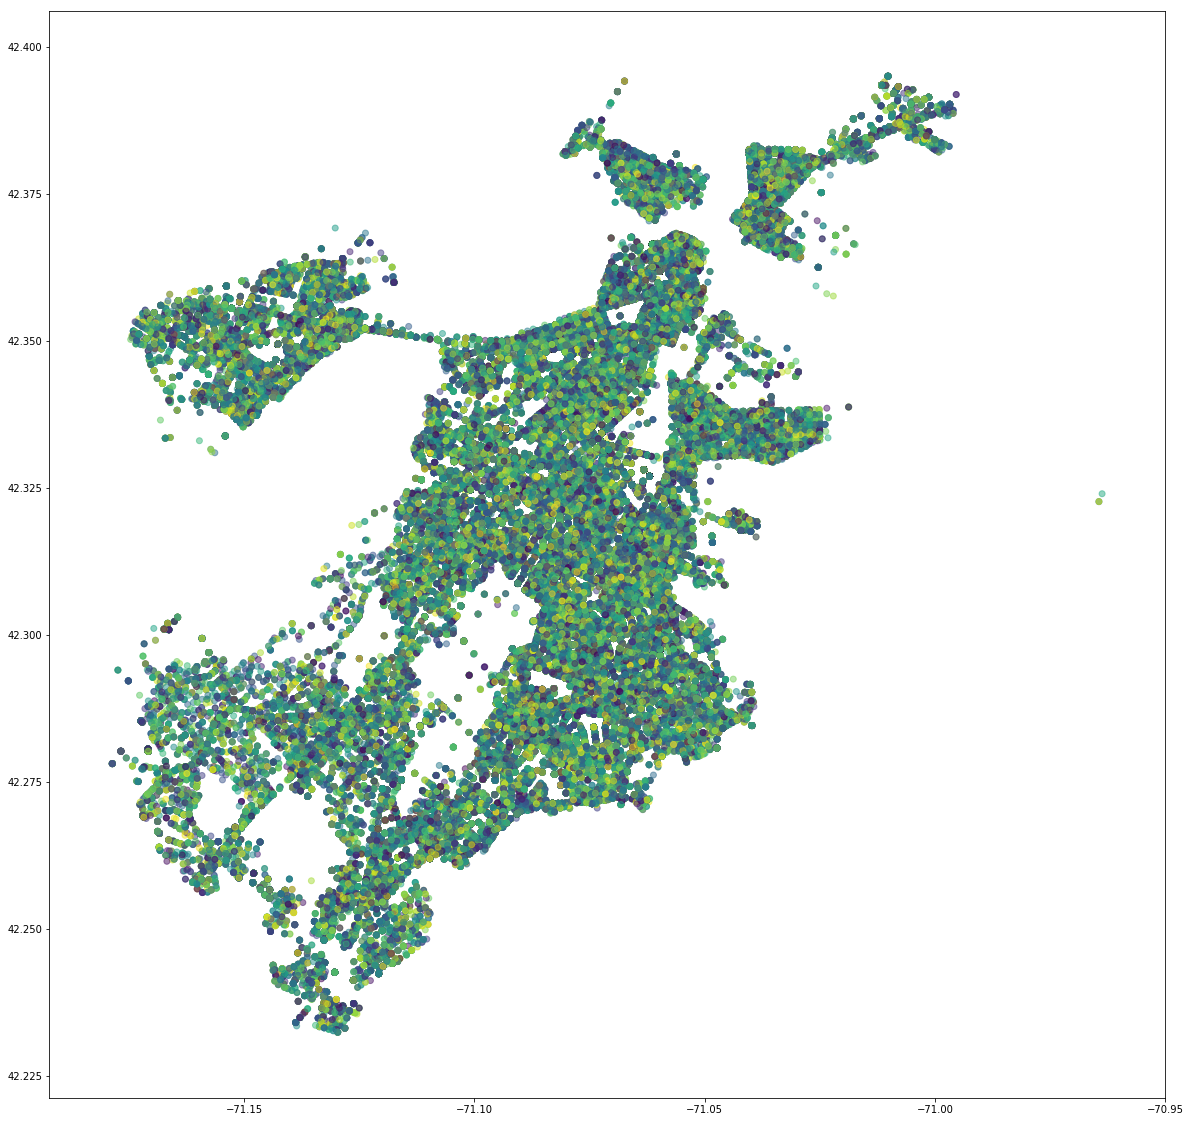

In [156]:
x = location['Long']
y = location['Lat']

colors = np.random.rand(len(location))

plt.figure(figsize=(20,20))
plt.scatter(x, y,c=colors, alpha=0.5)
plt.show()

#### KMeans

In [157]:
from sklearn.cluster import KMeans

In [158]:
X = location
X = X[~np.isnan(X)]

### 2 clusters

In [159]:
#K means Clustering #K means  
def doKmeans(X, nclust):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(X, 2)
kmeans = pd.DataFrame(clust_labels)
X.insert((X.shape[1]),'kmeans',kmeans)

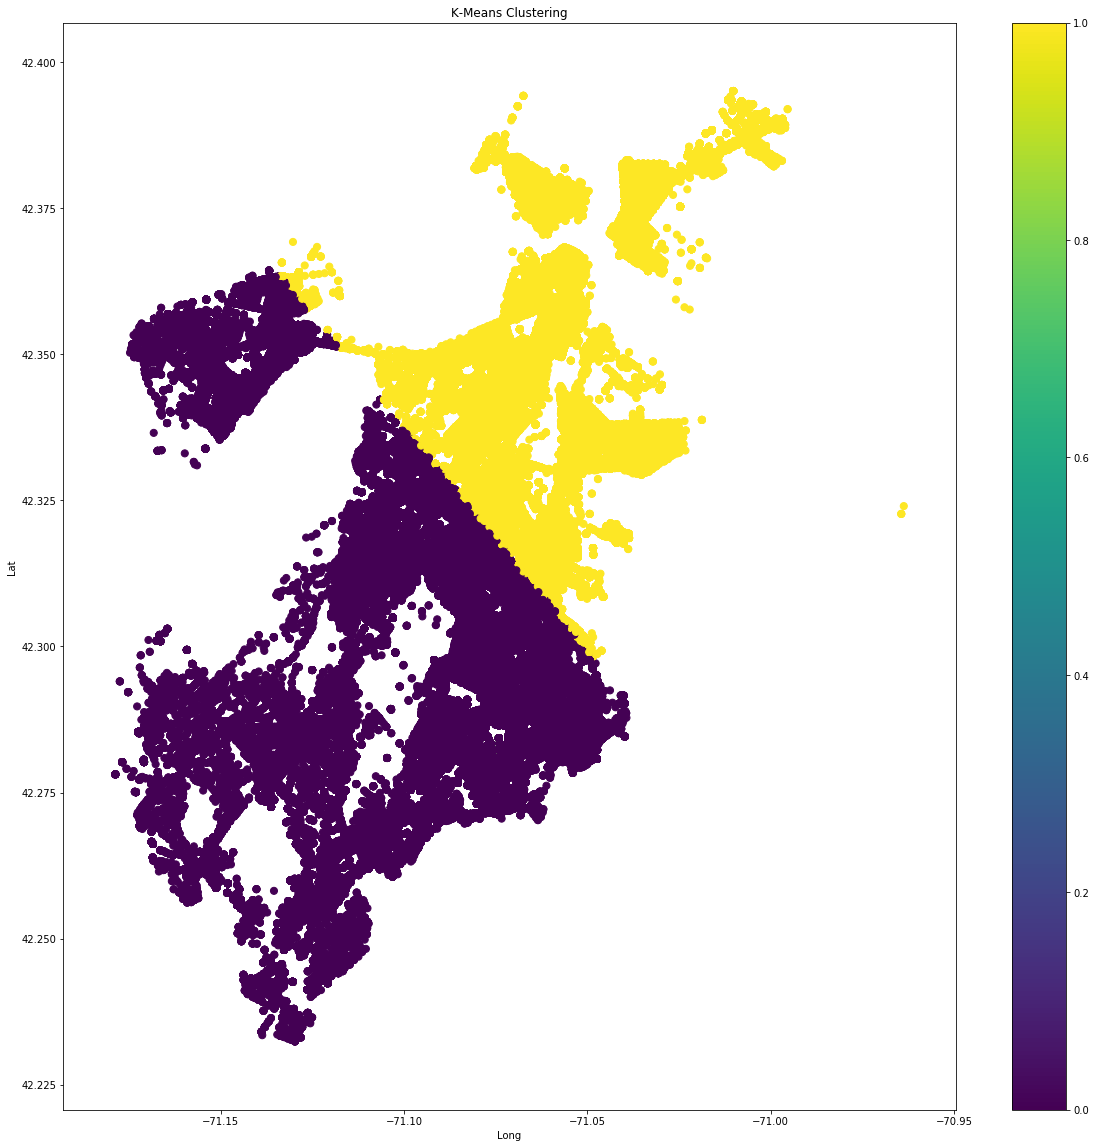

In [160]:
#Plot the clusters obtained using k means#Plot the 
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(X['Long'],X['Lat'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)

### 3 clusters

In [161]:
X = location
X = X[~np.isnan(X)]

In [162]:
clust_labels, cent = doKmeans(X, 3)
kmeans = pd.DataFrame(clust_labels)
X.insert((X.shape[1]),'kmeans',kmeans)

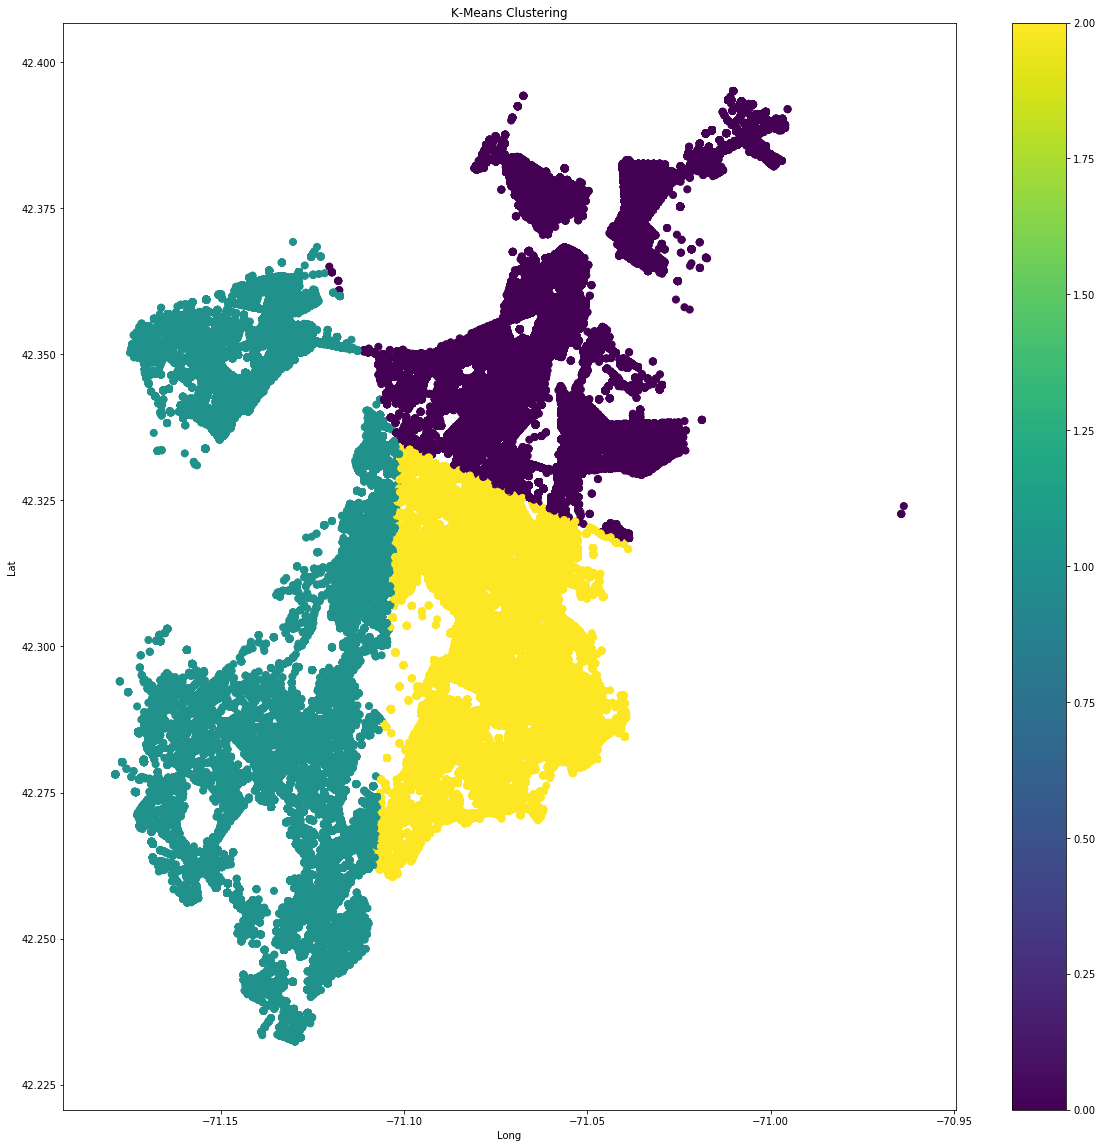

In [163]:
#Plot the clusters obtained using k means#Plot the 
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(X['Long'],X['Lat'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)

### 5 clusters

In [164]:
X = location
X = X[~np.isnan(X)]

In [165]:
clust_labels, cent = doKmeans(X, 5)
kmeans = pd.DataFrame(clust_labels)
X.insert((X.shape[1]),'kmeans',kmeans)

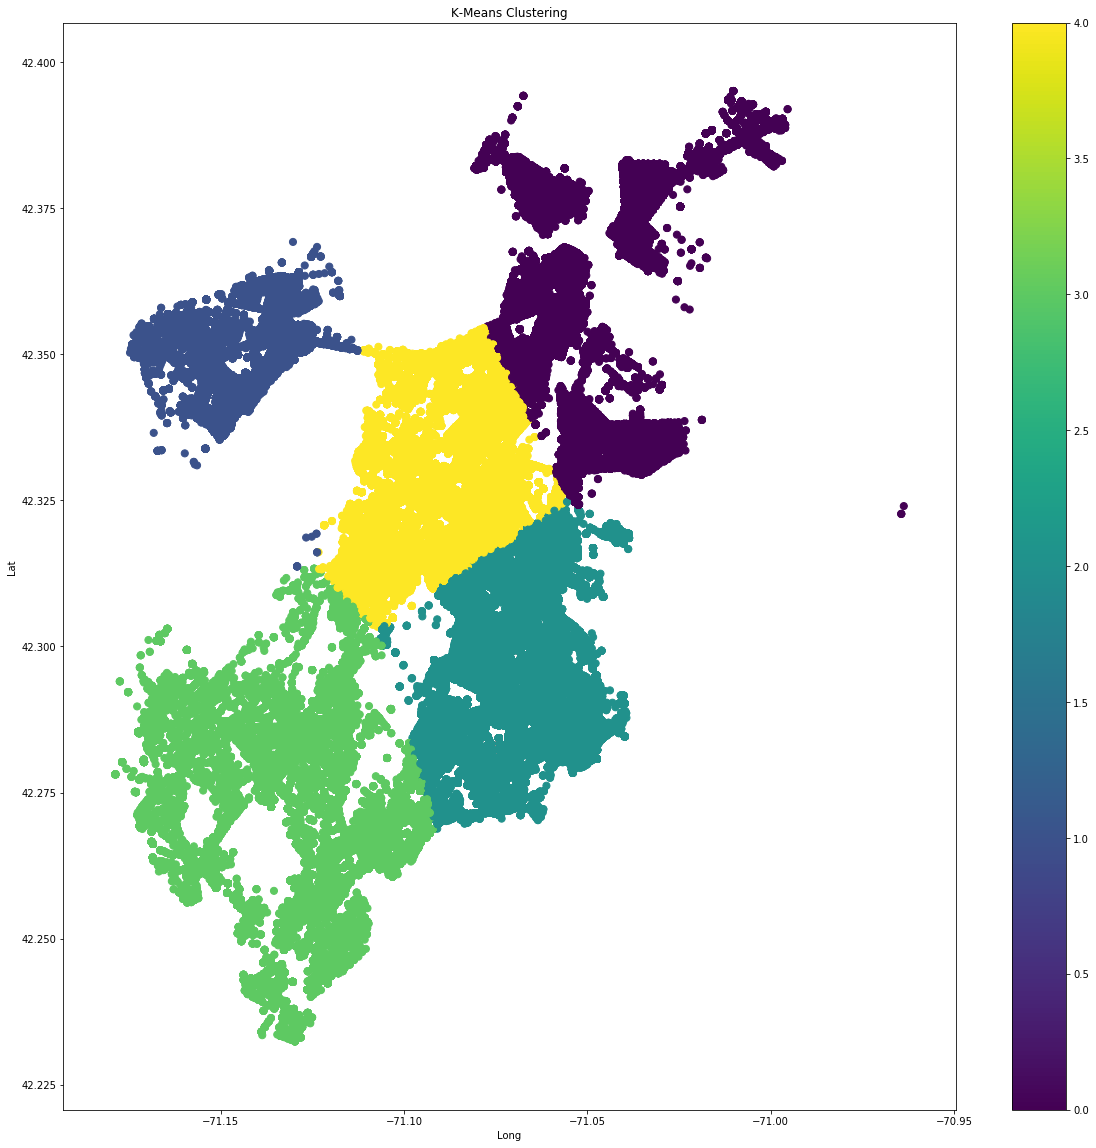

In [166]:
#Plot the clusters obtained using k means#Plot the 
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(X['Long'],X['Lat'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)

### 10 clusters

In [167]:
X = location
X = X[~np.isnan(X)]

In [168]:
clust_labels, cent = doKmeans(X, 20)
kmeans = pd.DataFrame(clust_labels)
X.insert((X.shape[1]),'kmeans',kmeans)

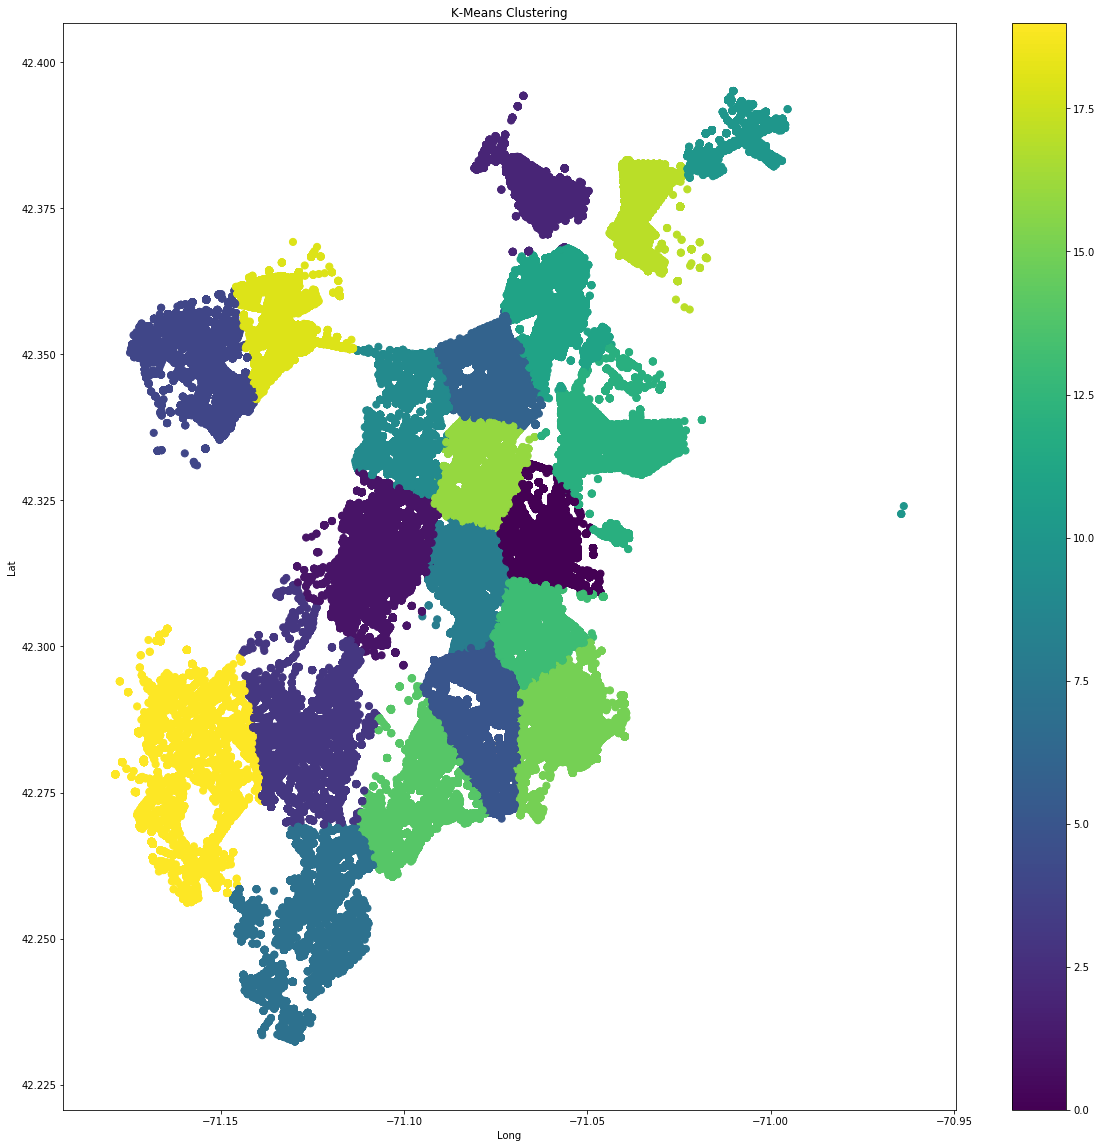

In [169]:
#Plot the clusters obtained using k means#Plot the 
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(X['Long'],X['Lat'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)

In [170]:
df_clus = df[['OFFENSE_CODE','Long','Lat']]

In [171]:
df_clus = df_clus.loc[(df_clus['Lat'] > 40) & (df_clus['Long'] < -60)]

In [173]:
df_clus = df_clus.dropna()

In [174]:
df_clus.describe()

,OFFENSE_CODE,Long,Lat
count,306413.000000,306413.000000,306413.000000
mean,2296.613835,-71.082841,42.322292
std,1182.763063,0.029744,0.031859
min,111.000000,-71.178674,42.232413
25%,802.000000,-71.097189,42.297555
50%,2907.000000,-71.077550,42.325646
75%,3201.000000,-71.062563,42.348624
max,3831.000000,-70.963676,42.395042


### 2 clus

In [175]:
X = df_clus
X = X[~np.isnan(X)]

In [176]:
clust_labels, cent = doKmeans(X, 2)
kmeans = pd.DataFrame(clust_labels)
X.insert((X.shape[1]),'kmeans',kmeans)

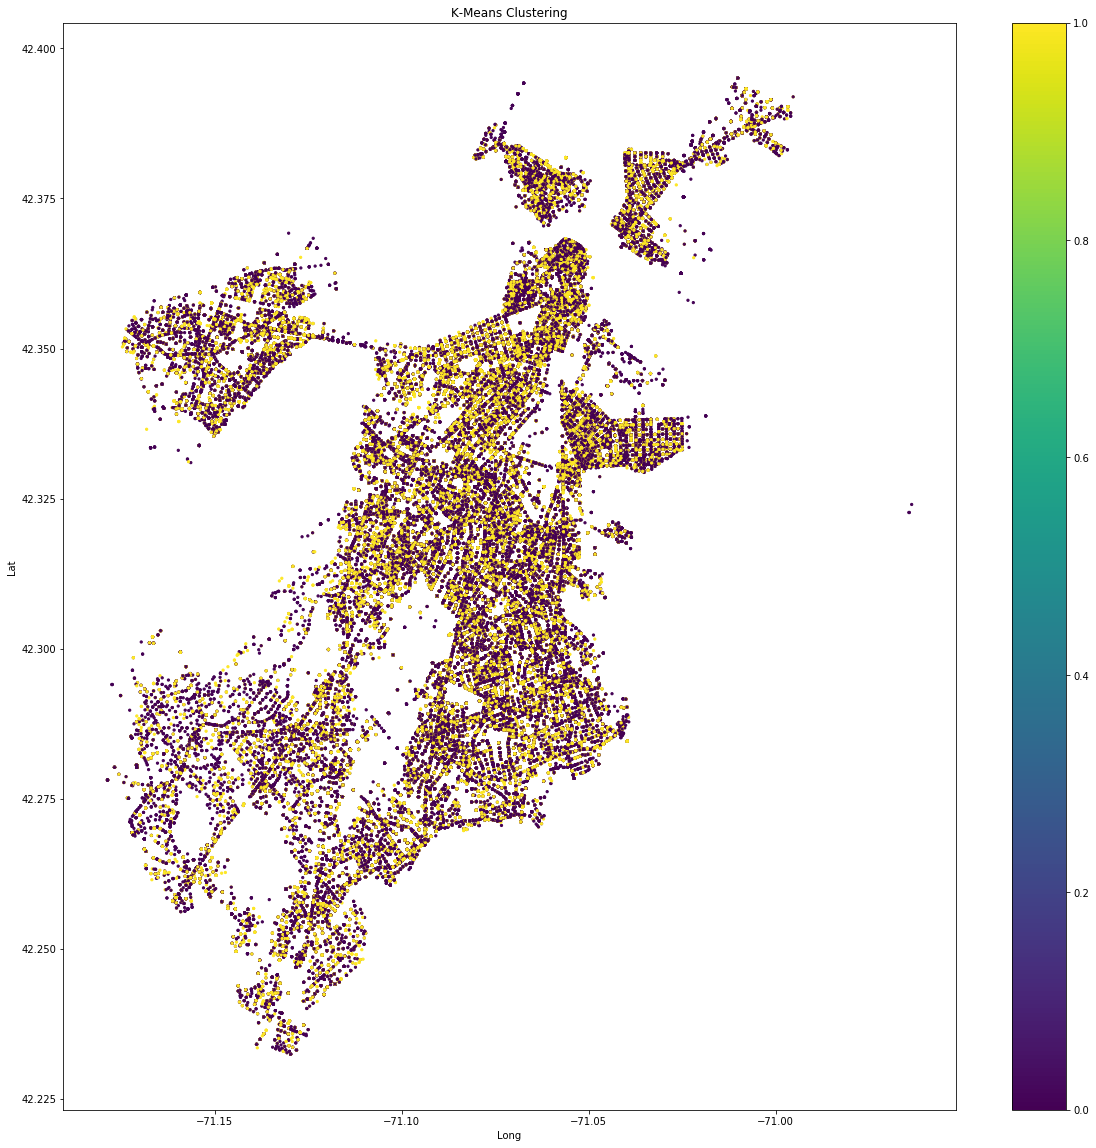

In [177]:
#Plot the clusters obtained using k means#Plot the 
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(X['Long'],X['Lat'],
                     c=kmeans[0],s=5)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)